# Missing Values Imputer

## Import Packages 

In [55]:
import pandas as pd 
from autoc.explorer import cserie,DataExploration
from autoc.utils.helpers import *
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
matplotlib.style.use('ggplot')
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12.0, 8)
np.random.seed(0)

## Give me some Credit data 

In [56]:
# Load Give me Some credit
path = '/Users/Damien/Google Drive/Auto_clean/Datasets/Give_Me_Some_Credit/cs-training.csv'
df_train = pd.read_csv(path)

In [57]:
# if you prefer to work with database 
# from sqlalchemy import create_engine
# engine = create_engine('sqlite://')
# df_train.to_sql('cstraining',engine)
# engine.table_names()
# test = pd.read_sql("select * from cstraining",engine)

In [58]:
df_train.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
5,0,0.213179,74,0,0.375607,3500,3,0,1,0,1
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0
7,0,0.754464,39,0,0.209940,3500,8,0,0,0,0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684,9,0,4,0,2


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [60]:
df_train.groupby('NumberOfDependents').mean()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents,,,,,,,,,,
0,0.058629,5.666405,54.396642,0.423247,418.946560,5873.411467,8.158052,0.291892,0.905641,0.268038
1,0.073529,4.852905,51.851117,0.365405,174.621397,7205.172361,9.175179,0.185553,1.143829,0.156901
2,0.081139,7.710358,46.460609,0.413636,242.657069,7576.163446,9.031657,0.205102,1.263754,0.182307
3,0.088263,9.341881,45.901086,0.361489,228.205045,8396.601029,8.938416,0.163239,1.267637,0.126542
4,0.103774,1.909806,45.562544,0.442348,212.753479,8691.199398,8.966108,0.205101,1.282320,0.171209
5,0.091153,0.393077,46.151475,0.461126,198.931910,9260.174165,8.979893,0.262735,1.286863,0.231903
6,0.151899,0.437257,47.075949,0.341772,126.818586,8686.493333,8.753165,0.139241,1.202532,0.120253
7,0.098039,0.401806,48.392157,0.372549,144.332806,8934.653061,8.196078,0.137255,1.235294,0.156863
8,0.083333,0.332304,49.541667,0.166667,88.093734,8312.954545,7.416667,0.166667,1.250000,0.000000


In [61]:
exploration = DataExploration(df_train)

In [62]:
exploration.structure()

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer
SeriousDlqin2yrs,int64,numeric,0,0.000000,2,False,False,False,floating
RevolvingUtilizationOfUnsecuredLines,float64,numeric,0,0.000000,125728,False,False,False,floating
age,int64,numeric,0,0.000000,86,False,False,False,floating
NumberOfTime30-59DaysPastDueNotWorse,int64,numeric,0,0.000000,16,False,False,False,floating
DebtRatio,float64,numeric,0,0.000000,114194,False,False,False,floating
MonthlyIncome,float64,numeric,29731,0.198207,13594,False,False,False,floating
NumberOfOpenCreditLinesAndLoans,int64,numeric,0,0.000000,58,False,False,False,floating
NumberOfTimes90DaysLate,int64,numeric,0,0.000000,19,False,False,False,floating
NumberRealEstateLoansOrLines,int64,numeric,0,0.000000,28,False,False,False,floating
NumberOfTime60-89DaysPastDueNotWorse,int64,numeric,0,0.000000,13,False,False,False,floating


In [63]:
exploration.nearzerovar()

                                      freq_ratio    nzv  percent_unique  \
SeriousDlqin2yrs                       13.961101  False        0.001333   
RevolvingUtilizationOfUnsecuredLines    1.060647  False       83.818667   
age                                     1.008145  False        0.057333   
NumberOfTime30-59DaysPastDueNotWorse    7.859914  False        0.010667   
DebtRatio                              17.960699  False       76.129333   
MonthlyIncome                           1.309117  False        9.062667   
NumberOfOpenCreditLinesAndLoans         1.027860  False        0.038667   
NumberOfTimes90DaysLate                27.019264   True        0.012667   
NumberRealEstateLoansOrLines            1.073560  False        0.018667   
NumberOfTime60-89DaysPastDueNotWorse   24.846624   True        0.008667   
NumberOfDependents                      3.302250  False        0.008667   

                                     zero_var  
SeriousDlqin2yrs                        False  
Rev

Index([u'NumberOfTimes90DaysLate', u'NumberOfTime60-89DaysPastDueNotWorse'], dtype='object')

In [64]:
exploration.findcorr()

['NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTime30-59DaysPastDueNotWorse']

### Bin true numeric values 

In [65]:
df_train_categoric = df_train.copy()

In [66]:
# Bin true numeric columns 
cols_to_bin = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome']
nb_quantiles = 10
for col in cols_to_bin:
    df_train_categoric.loc[:, col] = pd.qcut(df_train_categoric.loc[:,col],nb_quantiles).astype('str')

In [67]:
# Transform every variables to Categorical type of pandas 
# fix problem with category variable
# df_train_categoric = df_train_categoric.apply(lambda x: x.astype('str'),axis = 0)

In [68]:
df_train_categoric.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines     object
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                                object
MonthlyIncome                            object
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [69]:
df_train_categoric.describe()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,52.295207,0.421033,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,14.771866,4.192781,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,52.000000,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,63.000000,0.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,109.000000,98.000000,58.000000,98.000000,54.000000,98.000000,20.000000


In [70]:
df_simu = df_train_categoric.copy()

In [71]:
ec = DataExploration(df_simu)

In [120]:
def simulate_na_col(df, colname, n=None, pct=None, weights=None,
                    safety=True, *args, **kwargs):
    """ Simulate missing values in a column of categorical variables

    Notes
    -----
    Fix issue with category variable"""
    # if df.loc[:,colname].dtype == 'float' or df.loc[:,colname].dtype == 'int':
    #     raise ValueError('This function only support categorical variables')
    if (n is None) and (pct is not None):
        # be careful here especially if cols has a lot of missing values
        n = int(pct * df.shape[0])
    if isinstance(colname, pd.core.index.Index) or isinstance(colname, list):
        for c in colname:
            simulate_na_col(df, colname=c, n=n, pct=pct, weights=weights)
    else:
        if safety:
            tokeep = keep_category(df, colname, *args, **kwargs)
        col = df.loc[:, colname].drop(tokeep)  # we are not sampling from tokeep
        col = col.dropna()
        print(colname)
        col_distribution = col.value_counts(normalize=True, sort=False)
        labels = col_distribution.index  # characters
        # generate random pmf
        pmf_na = weights if weights else random_pmf(len(labels))
        na_distribution = pd.Series(data=pmf_na, index=labels)
        # draw samples from this pmf
        weights_na = col.apply(lambda x: na_distribution[x])
        weights_na /= weights_na.sum()
        index_to_replace = col.sample(
            n=n, weights=weights_na, replace=False).index
        df.loc[index_to_replace, colname] = np.nan


In [121]:
# fix problem with category variable
simulate_na_col(df_simu,list(df_train_categoric.columns),n=80000)

SeriousDlqin2yrs


ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
df_simu.isnull().sum(axis = 0)

In [ ]:
df_simu.hist()

In [ ]:
df_train_categoric.hist()

In [ ]:
df_train.dtypes

In [ ]:
kl_series(df_simu.SeriousDlqin2yrs,df_train_categoric.SeriousDlqin2yrs)

In [ ]:
df_simu.SeriousDlqin2yrs.dropna().value_counts(normalize=True).values

In [122]:
df_train_categoric.SeriousDlqin2yrs.value_counts(normalize=True).values

array([ 0.93316,  0.06684])

In [123]:
kl(df_train_categoric.SeriousDlqin2yrs.value_counts(normalize=True).values,df_simu.SeriousDlqin2yrs.dropna().value_counts(normalize=True).values)

0.0013693443297681535

In [124]:
for col in df_simu.columns:
    try : 
        print("Kullback-Leibler divergence between both distribution: {}".format(
                kl_series(df_simu.loc[:,col],df_train_categoric.loc[:,col])))
    except Exception as e:
        print('error:{}'.format(e))

Kullback-Leibler divergence between both distribution: 0.00128534752353
Kullback-Leibler divergence between both distribution: 0.0263177783594
error:operands could not be broadcast together with shapes (10,) (86,) 
Kullback-Leibler divergence between both distribution: 0.0169904920604
Kullback-Leibler divergence between both distribution: 0.0350394715702
Kullback-Leibler divergence between both distribution: 0.0713793069858
error:operands could not be broadcast together with shapes (11,) (58,) 
error:operands could not be broadcast together with shapes (6,) (19,) 
error:operands could not be broadcast together with shapes (6,) (28,) 
Kullback-Leibler divergence between both distribution: 0.0297289224161
Kullback-Leibler divergence between both distribution: 0.0339464853631


### NaImputer class test 

In [125]:
from autoc.naimputer import NaImputer
#missing_map

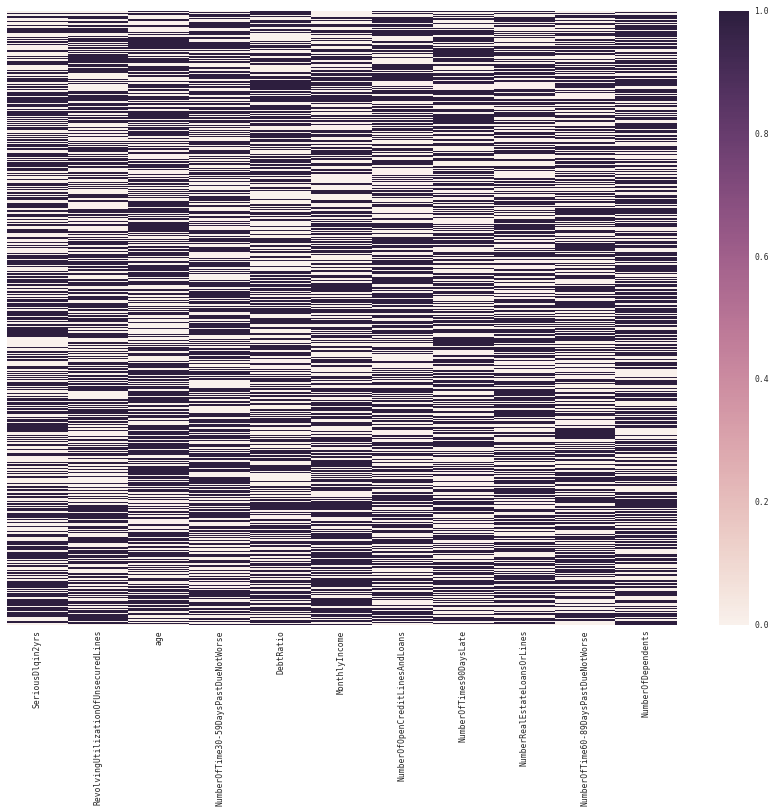

In [126]:
missing_map(df_simu,nmax=1000) # no pattern visible 

In [127]:
na = NaImputer(df_simu)

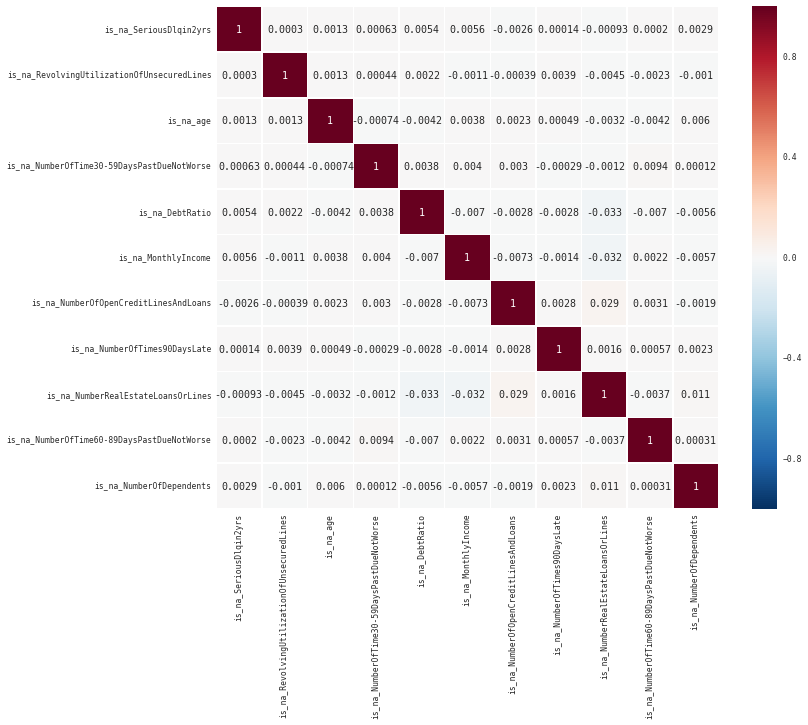

In [128]:
na.corrplot_na() # totally missing at random 

In [129]:
na.infos_na()

{'low_na_col': [],
 'many_na_col': [],
 'nacolcount':                                       Nanumber  Napercentage
 SeriousDlqin2yrs                         80000      0.533333
 RevolvingUtilizationOfUnsecuredLines     80000      0.533333
 age                                      80000      0.533333
 NumberOfTime30-59DaysPastDueNotWorse     80000      0.533333
 DebtRatio                                80000      0.533333
 MonthlyIncome                            80000      0.533333
 NumberOfOpenCreditLinesAndLoans          80000      0.533333
 NumberOfTimes90DaysLate                  80000      0.533333
 NumberRealEstateLoansOrLines             80000      0.533333
 NumberOfTime60-89DaysPastDueNotWorse     80000      0.533333
 NumberOfDependents                       83924      0.559493,
 'narowcount':         Nanumber  Napercentage
 0              5      0.000033
 1              3      0.000020
 2              4      0.000027
 3              5      0.000033
 4              7      0.000

### Prediction using skicit learn 

#### Structure of the data 

In [130]:
ec.structure()

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer
SeriousDlqin2yrs,float64,numeric,80000,0.533333,2,False,False,False,floating
RevolvingUtilizationOfUnsecuredLines,object,factor,80000,0.533333,10,False,False,False,mixed
age,float64,numeric,80000,0.533333,86,False,False,False,floating
NumberOfTime30-59DaysPastDueNotWorse,float64,numeric,80000,0.533333,16,False,False,False,floating
DebtRatio,object,factor,80000,0.533333,10,False,False,False,mixed
MonthlyIncome,object,character,80000,0.533333,11,False,False,False,mixed
NumberOfOpenCreditLinesAndLoans,float64,numeric,80000,0.533333,58,False,False,False,floating
NumberOfTimes90DaysLate,float64,numeric,80000,0.533333,19,False,False,False,floating
NumberRealEstateLoansOrLines,float64,numeric,80000,0.533333,28,False,False,False,floating
NumberOfTime60-89DaysPastDueNotWorse,float64,numeric,80000,0.533333,13,False,False,False,floating


#### Cleaning

In [131]:
# Dirty cleaning 
df_simu.loc[df_simu.NumberOfOpenCreditLinesAndLoans >=10,'NumberOfOpenCreditLinesAndLoans'] =10
df_simu.loc[df_simu.NumberRealEstateLoansOrLines >=5,'NumberRealEstateLoansOrLines'] = 5
df_simu.loc[df_simu.NumberOfTimes90DaysLate >=5,'NumberOfTimes90DaysLate'] = 5
df_simu.loc[df_simu.NumberOfTimes90DaysLate >=5,'NumberOfTimes90DaysLate'] = 5

#### Transformation to discrete variables 

In [132]:

df_simu.age = pd.qcut(df_simu.age,10)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
df_simu.age.value_counts()

In [ ]:
DataExploration(df_simu).structure()

#### Slkicit learn age imputation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
test = pd.get_dummies(df_simu[df_simu.age.isnull()].drop('age',axis =1).fillna('mean')).as_matrix()
X = pd.get_dummies(df_simu[df_simu.age.notnull()].drop('age',axis =1).fillna('mean')).as_matrix()
y = df_simu.age[df_simu.age.notnull()].values
clf.fit(X, y)

In [ ]:
X.shape

In [ ]:
# train prediction
X.shape
clf.predict(X)

In [ ]:
clf.predict_proba(X)

In [ ]:
clf.score(X, y, sample_weight=None)

In [ ]:
res= np.array([clf.predict(X),y]).T

In [ ]:
res

In [ ]:
# test prediction
test.shape
#clf.predict(test)

In [ ]:
y

In [ ]:
df_simu.drop('age',axis =1)

In [ ]:
df_simu.age.isnull()

In [ ]:
df_simu.age

# E-M  (MLE)

In [105]:
df_train.head() 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


In [106]:
df_simu.head(20) # /!\ categoric...

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,"(0.699, 0.981]",NaN,2,NaN,"(9083, 11666]",10,0,NaN,NaN,NaN
1,NaN,"(0.699, 0.981]","(34, 40]",0,NaN,"(2005, 3000]",4,NaN,0,0,1
2,NaN,NaN,"(34, 40]",NaN,NaN,"(3000, 3800]",2,1,0,0,0
3,0,NaN,NaN,0,NaN,"(3000, 3800]",NaN,0,0,0,NaN
4,NaN,NaN,"(45, 50]",NaN,NaN,NaN,7,NaN,NaN,0,0
5,0,"(0.154, 0.271]","(73, 109]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,NaN,NaN,NaN,0,NaN,nan,NaN,0,NaN,NaN,NaN
7,0,"(0.699, 0.981]",NaN,0,NaN,"(3000, 3800]",NaN,NaN,0,0,NaN
8,NaN,"(0.0832, 0.154]",NaN,0,NaN,nan,2,0,0,NaN,NaN
9,NaN,"(0.154, 0.271]",NaN,NaN,"(0.468, 0.649]",NaN,9,0,NaN,0,2


In [133]:
df_simu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        70000 non-null float64
RevolvingUtilizationOfUnsecuredLines    70000 non-null object
age                                     70000 non-null category
NumberOfTime30-59DaysPastDueNotWorse    70000 non-null float64
DebtRatio                               70000 non-null object
MonthlyIncome                           70000 non-null object
NumberOfOpenCreditLinesAndLoans         70000 non-null float64
NumberOfTimes90DaysLate                 70000 non-null float64
NumberRealEstateLoansOrLines            70000 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    70000 non-null float64
NumberOfDependents                      66076 non-null float64
dtypes: category(1), float64(7), object(3)
memory usage: 12.7+ MB


In [138]:
df_em=df_simu.drop(['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome'],axis=1)

In [142]:
df_em.head()

,SeriousDlqin2yrs,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,2,10,0,NaN,NaN,NaN
1,NaN,0,4,NaN,0,0,1
2,NaN,NaN,2,1,0,0,0
3,0,0,NaN,0,0,0,NaN
4,NaN,NaN,7,NaN,NaN,0,0
